In [22]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

In [2]:
tickers = ["MSFT", 'AMZN', 'AAPL', 'CSCO', 'IBM', 'FB']
close_prices = pd.DataFrame()

In [10]:
attempt = 0
drop = []
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop]
    for i in range (len(tickers)):
            temp = pdr.get_data_yahoo(tickers[i], dt.date.today() - dt.timedelta(3650))
            temp.dropna(inplace = True)
            close_prices[tickers[i]] = temp['Adj Close']
            drop.append(tickers[i])
        
    attempt+=1
        


In [8]:
close_prices.fillna(method = 'bfill', axis =0, inplace = True)
close_prices.dropna(method = 'bfill', axis =0, inplace = True)



TypeError: dropna() got an unexpected keyword argument 'method'

In [11]:
daily_return = close_prices.pct_change()
daily_return.mean()

MSFT    0.001035
AMZN    0.001332
AAPL    0.001165
CSCO    0.000558
IBM     0.000175
dtype: float64

In [12]:
daily_return.rolling(window=20).mean

<bound method Rolling.mean of Rolling [window=20,center=False,axis=0]>

In [13]:
daily_return.ewm(span=20,min_periods=20).mean()

,MSFT,AMZN,AAPL,CSCO,IBM
Date,,,,,
2011-01-12,NaN,NaN,NaN,NaN,NaN
2011-01-13,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN
2011-01-18,NaN,NaN,NaN,NaN,NaN
2011-01-19,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-01-04,-0.000645,-0.000659,0.000988,0.000359,-0.000025
2021-01-05,-0.000492,0.000356,0.002072,0.000368,0.001668
2021-01-06,-0.002914,-0.002049,-0.001332,0.001242,0.003887


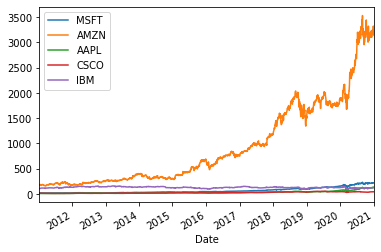

In [14]:
close_prices.plot()

In [16]:
cp_standardized = (close_prices - close_prices.mean())/close_prices.std()
cp_standardized

,MSFT,AMZN,AAPL,CSCO,IBM
Date,,,,,
2011-01-12,-0.870328,-0.910567,-0.953537,-0.969149,-1.910762
2011-01-13,-0.875649,-0.908815,-0.952007,-0.971643,-1.926992
2011-01-14,-0.874023,-0.904926,-0.948605,-0.963537,-1.858599
2011-01-18,-0.868702,-0.901907,-0.958118,-0.962913,-1.820926
2011-01-19,-0.871510,-0.907197,-0.960317,-0.987858,-1.528806
...,...,...,...,...,...
2021-01-04,2.754658,2.715743,3.731242,1.379579,-0.595798
2021-01-05,2.758562,2.754246,3.794337,1.381247,-0.419060
2021-01-06,2.653526,2.657470,3.620431,1.416270,-0.166002


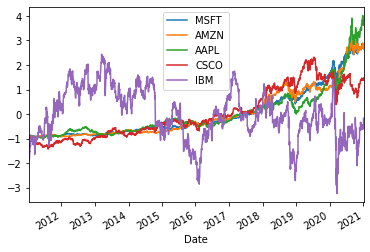

In [17]:
cp_standardized.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12718b390>,
      dtype=object)

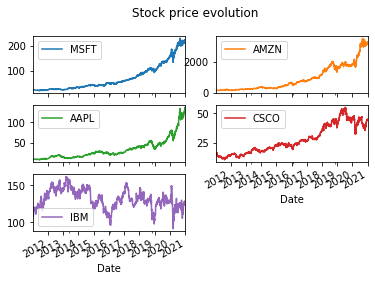

In [21]:
close_prices.plot(subplots = True, layout = (3,2), title = 'Stock price evolution')

[Text(0, 0.5, 'Mean daily return'),
 Text(0.5, 0, 'Tech Stocks'),
 Text(0.5, 1.0, 'Stock price evolution')]

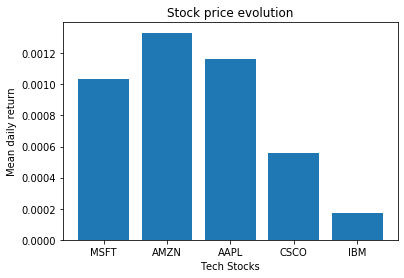

In [24]:
fig,ax = plt.subplots()
plt.bar(daily_return.columns, daily_return.mean())
ax.set(title = 'Stock price evolution', xlabel = 'Tech Stocks', ylabel = 'Mean daily return')